<a href="https://colab.research.google.com/github/asif851/Bank-Customer-Churn-Prediction-Model/blob/main/churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
## import necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')

In [60]:
#import csv file

url='/content/drive/MyDrive/Colab Notebooks/Bank_Customer_Churn/ Churn Modelling.csv'

df=pd.read_csv(url)
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [61]:
#No. of rows and columns

df.shape

(10000, 14)

**Analyze Each Feature**

In [62]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


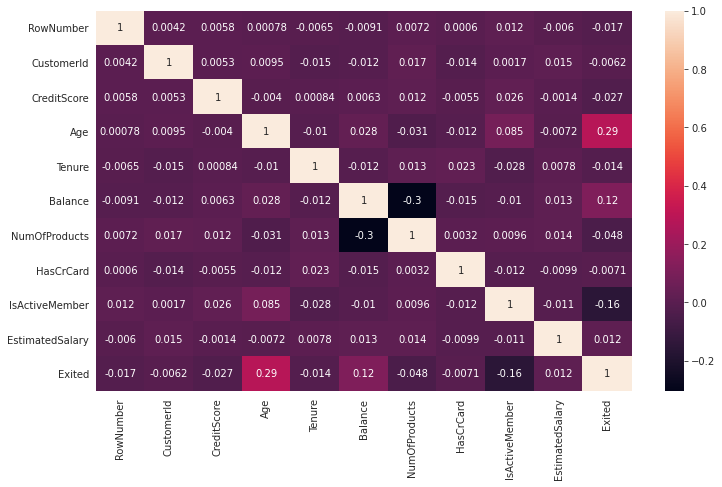

In [63]:
# correlation within features

plt.figure(figsize=(12,7))
corrMat=df.corr()
sns.heatmap(corrMat, annot=True)
plt.show()

**Geography**

In [64]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [65]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Text(0.5, 1.0, 'Geography')

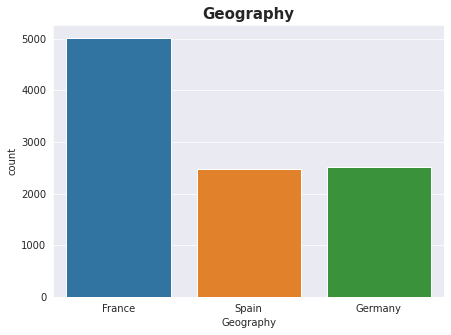

In [66]:
plt.figure(figsize=(7,5))
sns.countplot(x='Geography',data=df).set_title("Geography",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

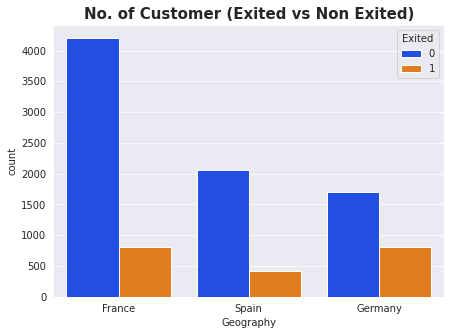

In [67]:
plt.figure(figsize=(7,5))
sns.countplot(x="Geography",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

**Gender**

In [68]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender')

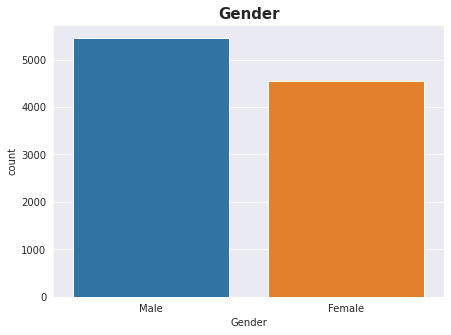

In [69]:
plt.figure(figsize=(7,5))
sns.countplot(x='Gender',order=["Male","Female"],data=df).set_title("Gender",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

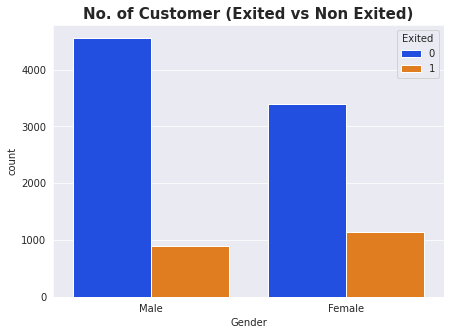

In [70]:
plt.figure(figsize=(7,5))
sns.countplot(x="Gender",hue="Exited",data=df,palette='bright',order=["Male","Female"]).set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

**Gender-Geography**

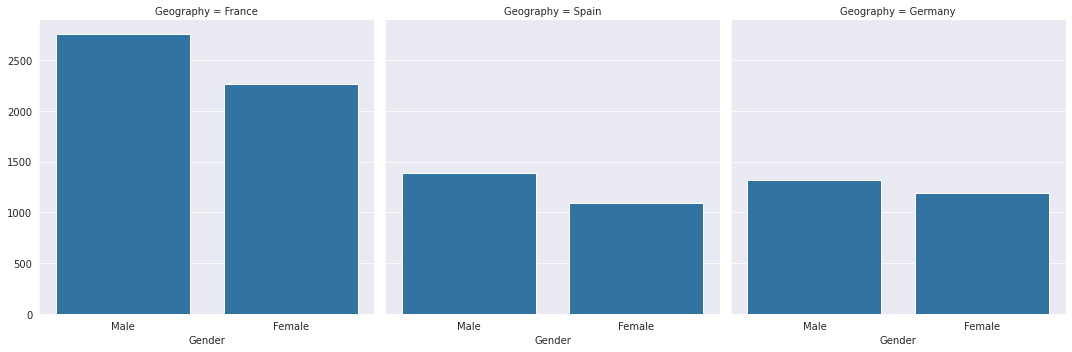

In [71]:
g = sns.FacetGrid(data=df, col="Geography", height=5, aspect=1)
g.map(sns.countplot, "Gender",  order=["Male", "Female"])

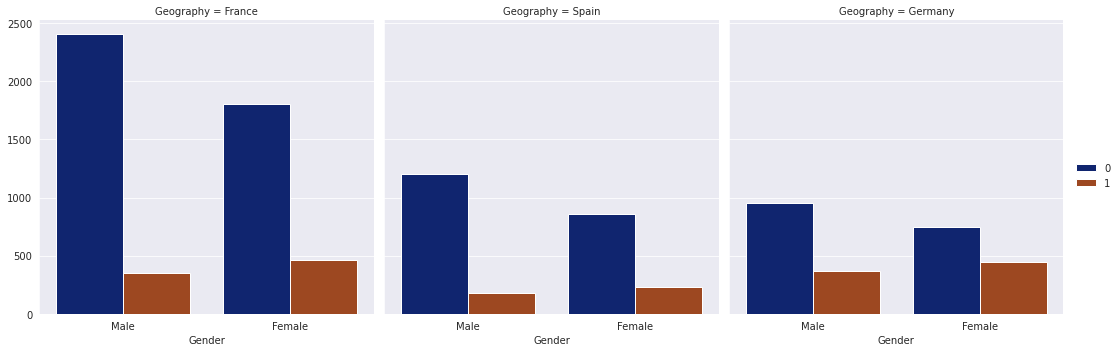

In [72]:
g = sns.FacetGrid(data=df, col="Geography", height=5, aspect=1)
g.map(sns.countplot, "Gender",hue="Exited" ,data=df,order=["Male", "Female"],palette="dark")
g.add_legend()  # 0 stands for Not Exited , 1 stands for Exited 

**Age**

In [73]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

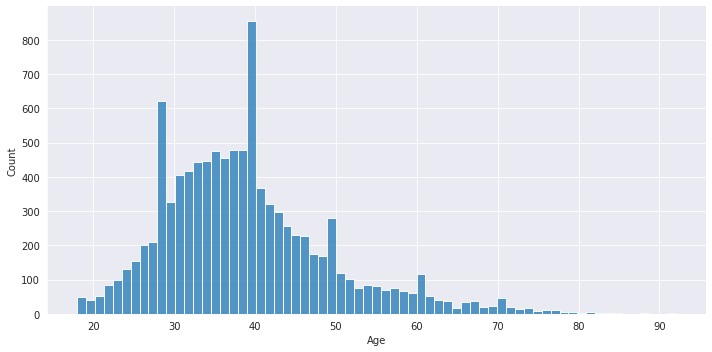

In [74]:
sns.displot(data=df, x="Age",height=5, aspect=2)

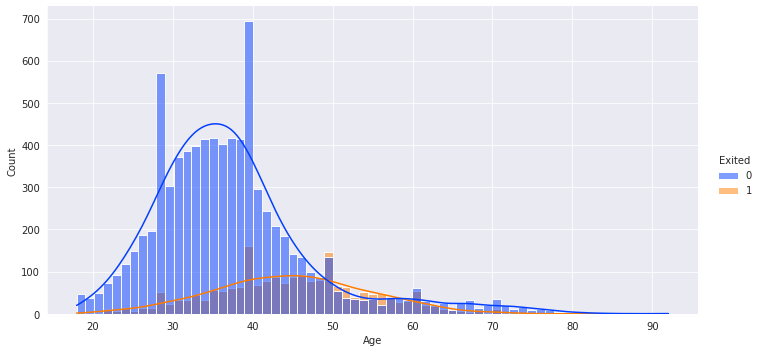

In [75]:
sns.displot(data=df, x="Age",hue="Exited",kind="hist",kde=True,palette="bright",height=5, aspect=2)

**No. of Product**

Text(0.5, 1.0, 'No. of Product')

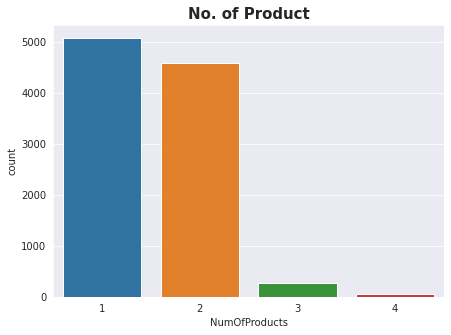

In [76]:
plt.figure(figsize=(7,5))
sns.countplot(x="NumOfProducts",data=df).set_title("No. of Product",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

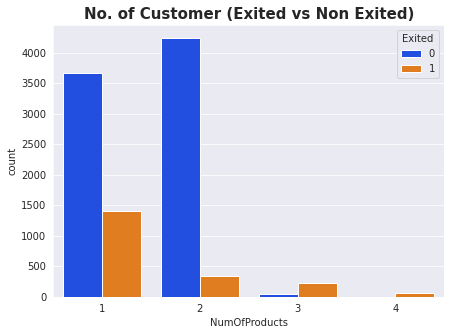

In [77]:
plt.figure(figsize=(7,5))
sns.countplot(x="NumOfProducts",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

**Tenure**

Text(0.5, 1.0, 'Tenure')

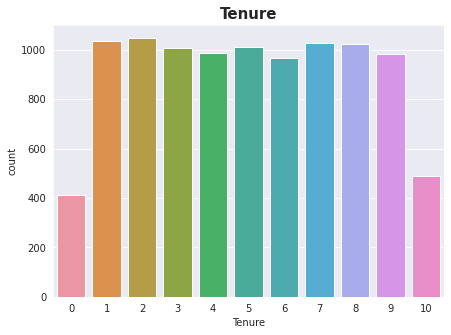

In [78]:
plt.figure(figsize=(7,5))
sns.countplot(x="Tenure",data=df).set_title("Tenure",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

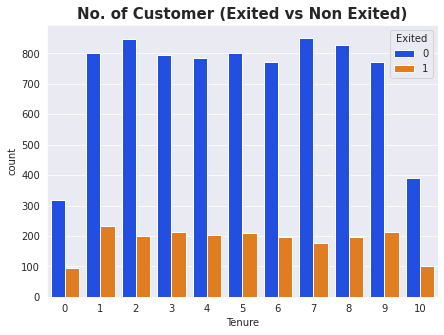

In [79]:
plt.figure(figsize=(7,5))
sns.countplot(x="Tenure",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

**Credit Card Holder**

Text(0.5, 1.0, 'No.of  Credit Card Holder')

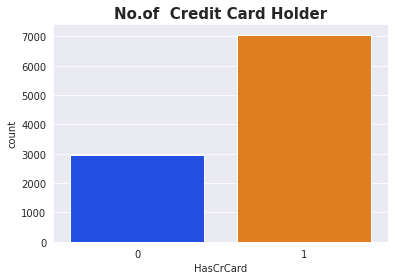

In [80]:
sns.countplot(x="HasCrCard",data=df,palette='bright').set_title("No.of  Credit Card Holder",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

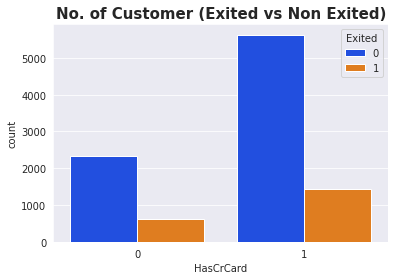

In [81]:
sns.countplot(x="HasCrCard",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

**Active Member**

Text(0.5, 1.0, 'ActiveMember')

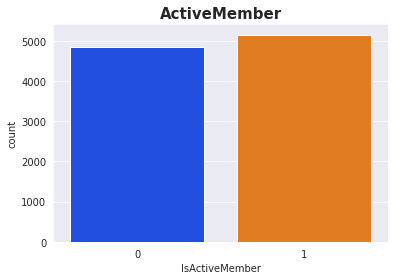

In [82]:
sns.countplot(x="IsActiveMember",data=df,palette='bright').set_title("ActiveMember",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

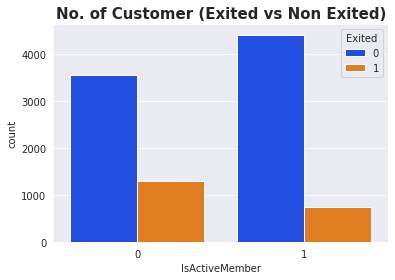

In [83]:
sns.countplot(x="IsActiveMember",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

**CreditScore**

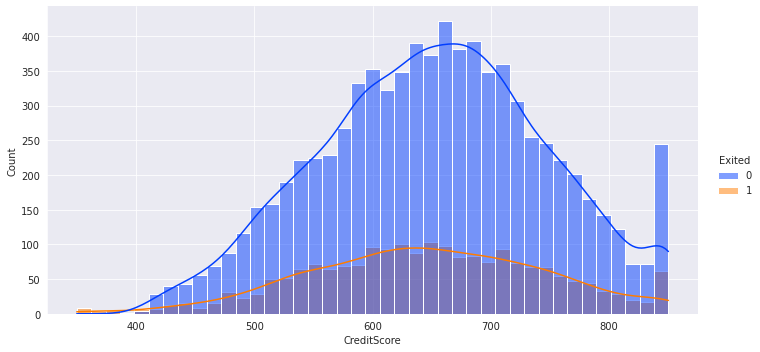

In [84]:

sns.displot(data=df, x="CreditScore",hue="Exited",palette="bright",kind="hist",kde=True,height=5, aspect=2)

**Balance**

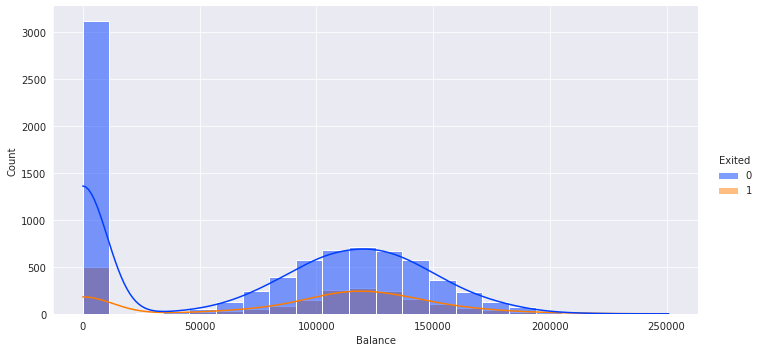

In [85]:
sns.displot(data=df, x="Balance",hue="Exited",kind="hist",kde=True,height=5, aspect=2,palette="bright")

**EstimatedSalary**

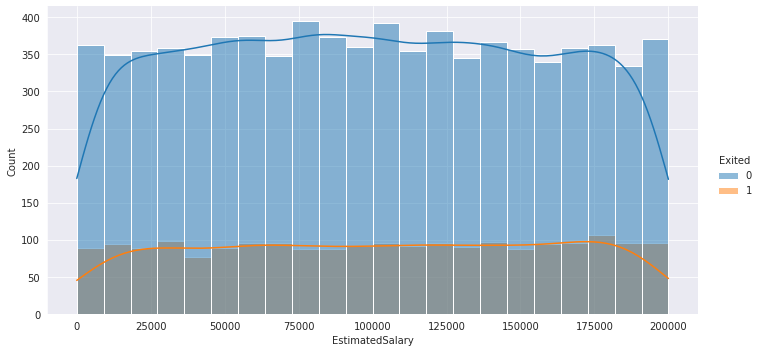

In [86]:
sns.displot(data=df, x="EstimatedSalary",hue="Exited",kind="hist",kde=True,height=5, aspect=2)